In [3]:
import os
import shutil
import random
from tqdm import tqdm

import numpy as np
import pandas as pd

import PIL
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset_path='Dataset\\'

In [5]:
labels=os.listdir(dataset_path)
labels

['Industrial', 'Residential']

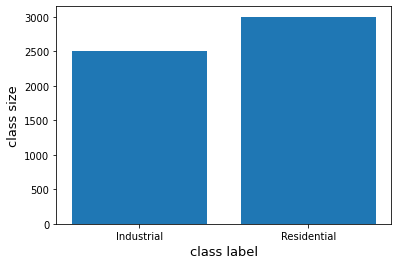

In [6]:
counts={}
for l in labels:
    counts[l]=len(os.listdir(os.path.join(dataset_path,l)))
plt.bar(range(len(counts)),list(counts.values()))
plt.xticks(range(len(counts)),list(counts.keys()))
plt.xlabel('class label', fontsize=13)
plt.ylabel('class size', fontsize=13)
plt.show()

In [7]:
img_paths = [os.path.join(dataset_path, l, l+'_1000.jpg') for l in labels]
img_paths = img_paths + [os.path.join(dataset_path, l, l+'_2000.jpg') for l in labels]
img_paths

['Dataset\\Industrial\\Industrial_1000.jpg',
 'Dataset\\Residential\\Residential_1000.jpg',
 'Dataset\\Industrial\\Industrial_2000.jpg',
 'Dataset\\Residential\\Residential_2000.jpg']

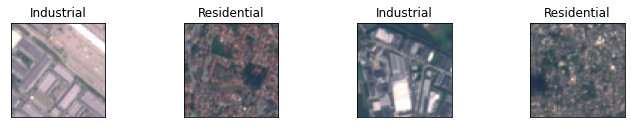

In [8]:
def plot_sat_imgs(paths):
    plt.figure(figsize=(15, 8))
    for i in range(4):
        plt.subplot(4, 5, i+1, xticks=[], yticks=[])
        img = PIL.Image.open(paths[i], 'r')
        plt.imshow(np.asarray(img))
        plt.title(paths[i].split('\\')[-2])
plot_sat_imgs(img_paths)

In [9]:
from skimage import io

def plot_img_histogram(img_path):
    
    image = io.imread(img_path)
    plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    plt.xlabel('Intensity')
    plt.ylabel('Count')
    plt.title(img_path.split('\\')[-2])
    plt.show()

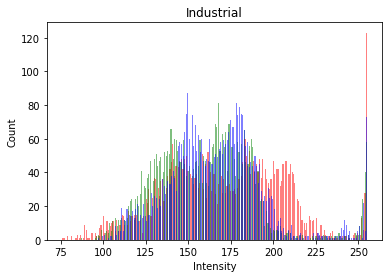

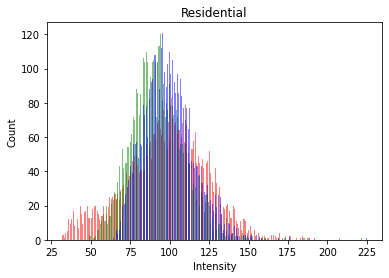

In [10]:
for l in labels:
    path = os.path.join(dataset_path, l, l+'_1000.jpg')
    plot_img_histogram(path)

In [11]:
import re
from sklearn.model_selection import StratifiedShuffleSplit
from keras.preprocessing.image import ImageDataGenerator

In [12]:
train_dir=dataset_path+'data_train'
test_dir=dataset_path+'data_test'
batch_size=32
num_classes=2
input_shape=(64,64,3)
class_mode='binary'

for path in (train_dir,test_dir):
    if not os.path.exists(path):
        os.mkdir(path)
        
for l in labels:
    if not os.path.exists(os.path.join(train_dir,l)):
        os.mkdir(os.path.join(train_dir,l))
    if not os.path.exists(os.path.join(test_dir,l)):
        os.mkdir(os.path.join(test_dir,l)) 

In [13]:
data={}
for l in labels:
    for img in os.listdir(dataset_path+l):
        data.update({os.path.join(dataset_path, l, img): l})
        

In [14]:
X=pd.Series(list(data.keys()))
y=pd.get_dummies(pd.Series(data.values()))

In [15]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=42)

for train_idx,test_idx in split.split(X,y):
    train_paths=X[train_idx]
    test_paths=X[test_idx]

In [17]:
new_train_paths=[re.sub('Dataset','Dataset\\\data_train',i) for i in train_paths]
new_test_paths=[re.sub('Dataset','Dataset\\\data_test',i) for i in test_paths]

In [18]:
train_path_map=list((zip(train_paths,new_train_paths)))
test_path_map=list((zip(test_paths,new_test_paths)))

In [19]:
print("moving training files..")
for i in tqdm(train_path_map):
    if not os.path.exists(i[1]):
        if not os.path.exists(re.sub('data_train', 'data_test', i[1])):
            shutil.copy(i[0], i[1])
    
print("moving testing files..")
for i in tqdm(test_path_map):
    if not os.path.exists(i[1]):
        if not os.path.exists(re.sub('data_train', 'data_test', i[1])):
            shutil.copy(i[0], i[1])    

moving training files..


100%|██████████████████████████████████████████████████████████████████████████████| 3850/3850 [00:42<00:00, 89.72it/s]


moving testing files..


100%|██████████████████████████████████████████████████████████████████████████████| 1650/1650 [00:20<00:00, 79.12it/s]
